In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import os
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
os.chdir('..')
%pwd

'/home/jyuwei/code/WordEmbedding-SubCulture/src'

In [50]:
with open('../result/state_prediction/epa', 'r') as fp:
    epa = np.array(json.load(fp))
print(epa.shape)
print(np.mean(epa, axis=0))
print(np.std(epa, axis=0))

(1535, 4, 3)
[[0.70723476 0.98625643 1.00427553]
 [0.91598237 1.04394839 1.02002446]
 [0.74807904 0.91702812 0.98290635]
 [0.82377914 0.91813606 0.83438298]]
[[1.61340015 1.34420306 1.25740497]
 [1.49462619 1.33083927 1.29835515]
 [1.49665259 1.31669402 1.3087317 ]
 [1.41132884 1.33070558 1.29981225]]


In [63]:
def plot(svo):
    with open('../result/state_prediction/general_%s' % svo, 'r') as fp:
        general = np.array(json.load(fp))
    with open('../result/state_prediction/github_%s' % svo, 'r') as fp:
        github = np.array(json.load(fp))
    with open('../result/state_prediction/twitter_%s' % svo, 'r') as fp:
        twitter = np.array(json.load(fp))
    for axis in range(0, 3):
        plt.figure()
        sns.distplot(epa[:, svo, axis], color='y')
        sns.distplot(general[:, axis], color='g')
        sns.distplot(github[:, axis], color='r')
        sns.distplot(twitter[:, axis], color='b')
    print('=====epa=====')
    print(np.mean(epa[:, svo, :], axis=0))
    print(np.std(epa[:, svo, :], axis=0))
    print(epa[:, svo, :].shape)
    print('=====github=====')
    print(np.mean(github, axis=0))
    print(np.std(github, axis=0))
    print(github.shape)
    print('=====twitter=====')
    print(np.mean(twitter, axis=0))
    print(np.std(twitter, axis=0))
    print(twitter.shape)

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


=====epa=====
[0.70723476 0.98625643 1.00427553]
[1.61340015 1.34420306 1.25740497]
(1535, 3)
=====github=====
[0.73608802 1.05439005 1.08165694]
[0.39154205 0.21431742 0.22707186]
(77, 3)
=====twitter=====
[0.67516839 1.02638439 1.04627242]
[0.47347643 0.25421907 0.26923969]
(98, 3)


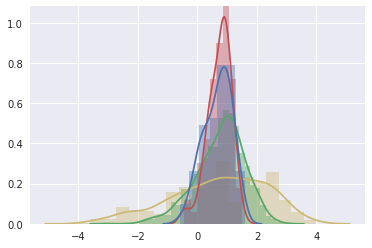

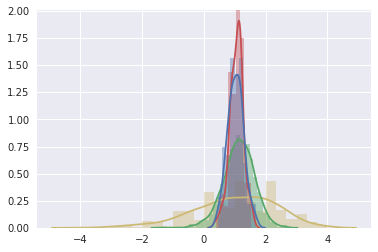

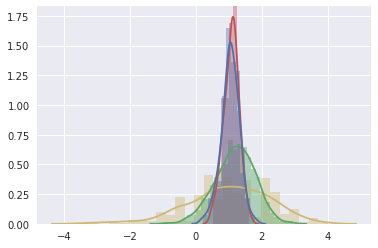

In [64]:
plot(0)

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


=====epa=====
[0.91598237 1.04394839 1.02002446]
[1.49462619 1.33083927 1.29835515]
=====github=====
[0.94382359 1.13451692 1.14457062]
[0.44018038 0.27405042 0.26690134]
=====twitter=====
[0.98355011 1.15384379 1.13455557]
[0.49357018 0.30914455 0.28611994]


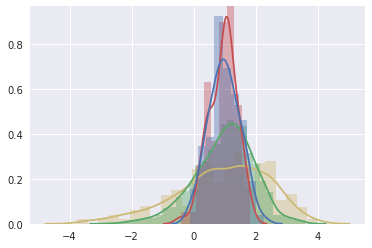

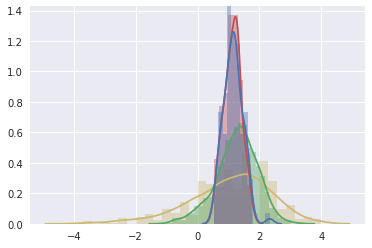

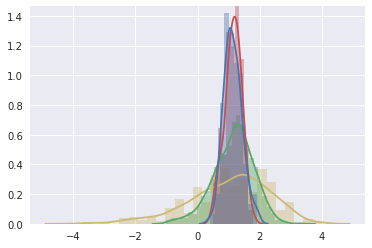

In [52]:
plot(1)

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


=====epa=====
[0.74807904 0.91702812 0.98290635]
[1.49665259 1.31669402 1.3087317 ]
=====github=====
[0.8808294  1.01046142 1.04941712]
[0.35817057 0.23967877 0.22324623]
=====twitter=====
[0.77420643 0.90230951 0.96848614]
[0.45207543 0.32061717 0.26434704]


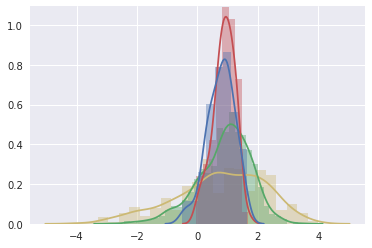

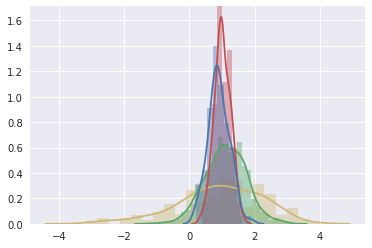

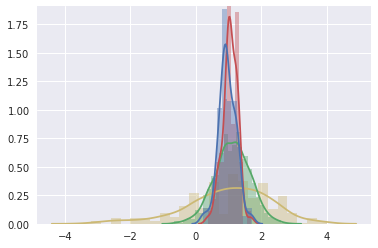

In [53]:
plot(2)

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


=====epa=====
[0.82377914 0.91813606 0.83438298]
[1.41132884 1.33070558 1.29981225]
=====github=====
[1.08435787 1.06503705 0.87263697]
[0.27462699 0.21256998 0.27650118]
=====twitter=====
[0.96307108 0.96201807 0.75736118]
[0.46097089 0.35781576 0.45287632]


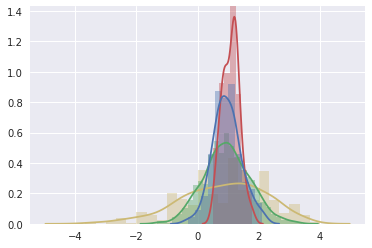

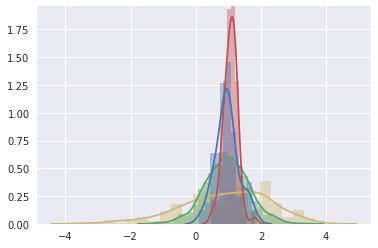

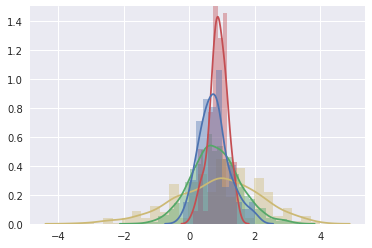

In [54]:
plot(3)

In [89]:
with open('../result/state_prediction/svo_epa', 'r') as fp:
    svo_epa = dict((str(item[0]), item[1]) for item in json.load(fp))
with open('../result/state_prediction/svo_general', 'r') as fp:
    svo_general = dict((str(item[0]), item[1]) for item in json.load(fp))
with open('../result/state_prediction/svo_github', 'r') as fp:
    svo_github = dict((str(item[0]), item[1]) for item in json.load(fp))
with open('../result/state_prediction/svo_twitter', 'r') as fp:
    svo_twitter = dict((str(item[0]), item[1]) for item in json.load(fp))

In [90]:
svo_common = list(set(svo_github.keys()) & set(svo_twitter.keys()) & set(svo_general.keys()))
print(svo_common)
print(len(svo_common))

["['teacher', 'arrested', 'student']", "['judge', 'struck', 'judge']", "['government', 'inherit', 'economy']", "['dead', 'blast', 'pipeline']", "['winter', 'led', 'dish']", "['gold', 'nugget', 'discovered']", "['egg', 'risk', 'dog']", "['diplomat', 'injured', 'attempt']", "['vote', 'vote', 'vote']", "['rigorous', 'test', 'disorder']", "['claim', 'claim', 'claim']", "['police', 'ponder', 'soldier']", "['chief', 'wounded', 'attack']", "['military', 'soldier', 'soldier']", "['minister', 'dismissed', 'speaker']", "['cocoa', 'blood', 'brain']", "['president', 'leave', 'owner']", "['collision', 'collision', 'several']", "['woman', 'death', 'death']", "['school', 'killing', 'girlfriend']", "['daughter', 'died', 'mother']", "['family', 'crash', 'death']", "['personal', 'instead', 'property']", "['victim', 'pay', 'crash']", "['corn', 'change', 'diet']", "['peace', 'brings', 'development']", "['opera', 'loving', 'delivers']", "['plant', 'perform', 'ritual']", "['bomb', 'killed', 'car']", "['bond

In [91]:
for svo in svo_common:
    print(svo)
    print(svo_epa[svo])
    print(svo_general[svo])
    print(svo_github[svo])

['teacher', 'arrested', 'student']
[[-1.3333333333, -1.6666666667, 0.6666666667], [2.6666666667, 1.3333333333, 1.3333333333], [1.3333333333, 2.0, 2.0], [1.0, 1.3333333333, 1.6666666667]]
[[-0.014924740182940543, 1.086503149347569, 0.7525225869679548], [1.2021292466032625, 1.4824551161542607, 1.6704708871529914], [0.5836742891833471, 1.4078925047987476, 1.3062219658360144], [1.2815249289792006, 1.2478998625606956, 0.7962953944947401]]
[[1.0876365794352445, 1.182757008590637, 1.4842356013512252], [1.4502994114869068, 1.325342904190736, 1.5205745148032115], [1.0776237002929925, 1.3552205956424574, 1.228796352847182], [1.3059150221205198, 1.3385807836944354, 1.2756017314327397]]
['judge', 'struck', 'judge']
[[0.5, 0.5, -1.5], [-2.0, 1.0, -2.0], [0.5, -2.5, 0.0], [-1.0, 0.0, 0.5]]
[[0.14734076811161978, 0.4565660034586694, 0.16752140647452785], [-0.47015710653249987, 1.230473200919502, 0.23966401132694515], [-0.17124079991375196, 0.0969042200510799, 0.7602705650281261], [-0.3679789679549955

In [100]:
def subplot(svo_axis):
    sub_svo_epa = np.array([svo_epa[svo][svo_axis] for svo in svo_common])
    sub_svo_github = np.array([svo_github[svo][svo_axis] for svo in svo_common])
    sub_svo_twitter = np.array([svo_twitter[svo][svo_axis] for svo in svo_common])
    print(sub_svo_epa.shape)
    for axis in range(0, 3):
        plt.figure()
        sns.distplot(sub_svo_epa[:, axis], color='y')
        sns.distplot(sub_svo_github[:, axis], color='r')
        sns.distplot(sub_svo_twitter[:, axis], color='b')

(76, 3)


/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


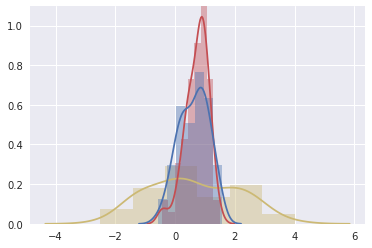

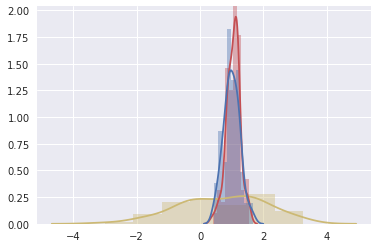

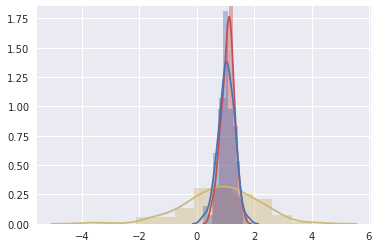

In [101]:
subplot(0)